Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [186]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [187]:
# Pasamos los Square Feet a Square Meters en la columna Square.Meters
airbnb$Square.Meters <- airbnb$Square.Feet * 0.092903

# eliminnamos columna Square.Feet.
airbnbFiltroCol <- airbnb[,c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude', 'Square.Meters')]
head(airbnbFiltroCol)

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Amsterdam,Private room,,2,1.0,1,1,100,1,20,NA,52.34923,4.878709,NA
2,Barcelona,Private room,Camp d'en Grassot i Gràcia Nova,3,1.0,1,2,45,1,15,96,41.40363,2.164741,NA
3,Barcelona,Entire home/apt,,4,1.0,0,1,78,2,32,NA,41.38496,2.167272,NA
4,Barcelona,Entire home/apt,Dreta de l'Eixample,4,1.0,1,1,299,1,0,NA,41.39192,2.177994,NA
5,Barcelona,Private room,La Nova Esquerra de l'Eixample,2,NA,1,1,37,1,10,97,41.38680,2.159715,NA
6,Amsterdam,Entire home/apt,Oud-West,5,1.5,3,5,220,2,30,100,52.36148,4.867638,NA


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [188]:
df_madrid <- subset(airbnbFiltroCol, City == 'Madrid' & Room.Type == 'Entire home/apt' & Neighbourhood != '')
borrarCol <- c('Room.Type', 'City')
df_madrid <- df_madrid[ , !(names(df_madrid) %in% borrarCol)]
summary(df_madrid)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :2405                    NA's   :14      NA's   :7       
      Beds            Price        Guests.Included   Extra.People   
 Min.   : 1.000   Min.   : 10.00   Min.   : 1.000   Min.   :  0.00  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.: 1.000   1st Qu.:  0.00  
 Median : 2.000   Median : 75.00   Median : 2.000   Median : 10.00  
 Mean   : 2.393   Mean   : 88.74   Mean   : 1.952   Mean   :  8.79  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 2.000   3rd Qu.: 15.00  
 Max.   :16.000   Max.   :

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [189]:
porcentajeNASqM <- sum(is.na(df_madrid$Square.Meters) / nrow(df_madrid)) * 100
paste("El porcentaje de NA en la columna Square.Meters es: ", porcentajeNASqM,"%")

[1] "El porcentaje de NA en la columna Square.Meters es:  93.8046777361185 %"

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [190]:
porcentaje0 <- round(sum(df_madrid$Square.Meters == 0,na.rm=T) / sum(!is.na(df_madrid$Square.Meters)) * 100 , 2)
print(paste("El porcentaje de apartamentos que tienen 0 metros cuadrados es: ",porcentaje0,"%"))

[1] "El porcentaje de apartamentos que tienen 0 metros cuadrados es:  36.89 %"


Reemplazar todos los 0m^2 por NA 

In [191]:
library(dplyr)
df_madrid<-df_madrid %>% mutate(Square.Meters = ifelse(Square.Meters==0, NA, Square.Meters))

summary(df_madrid)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :2405                    NA's   :14      NA's   :7       
      Beds            Price        Guests.Included   Extra.People   
 Min.   : 1.000   Min.   : 10.00   Min.   : 1.000   Min.   :  0.00  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.: 1.000   1st Qu.:  0.00  
 Median : 2.000   Median : 75.00   Median : 2.000   Median : 10.00  
 Mean   : 2.393   Mean   : 88.74   Mean   : 1.952   Mean   :  8.79  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 2.000   3rd Qu.: 15.00  
 Max.   :16.000   Max.   :

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA.

Antes de eso deberíamos pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.

Warning message:
“Removed 5382 rows containing non-finite values (stat_bin).”


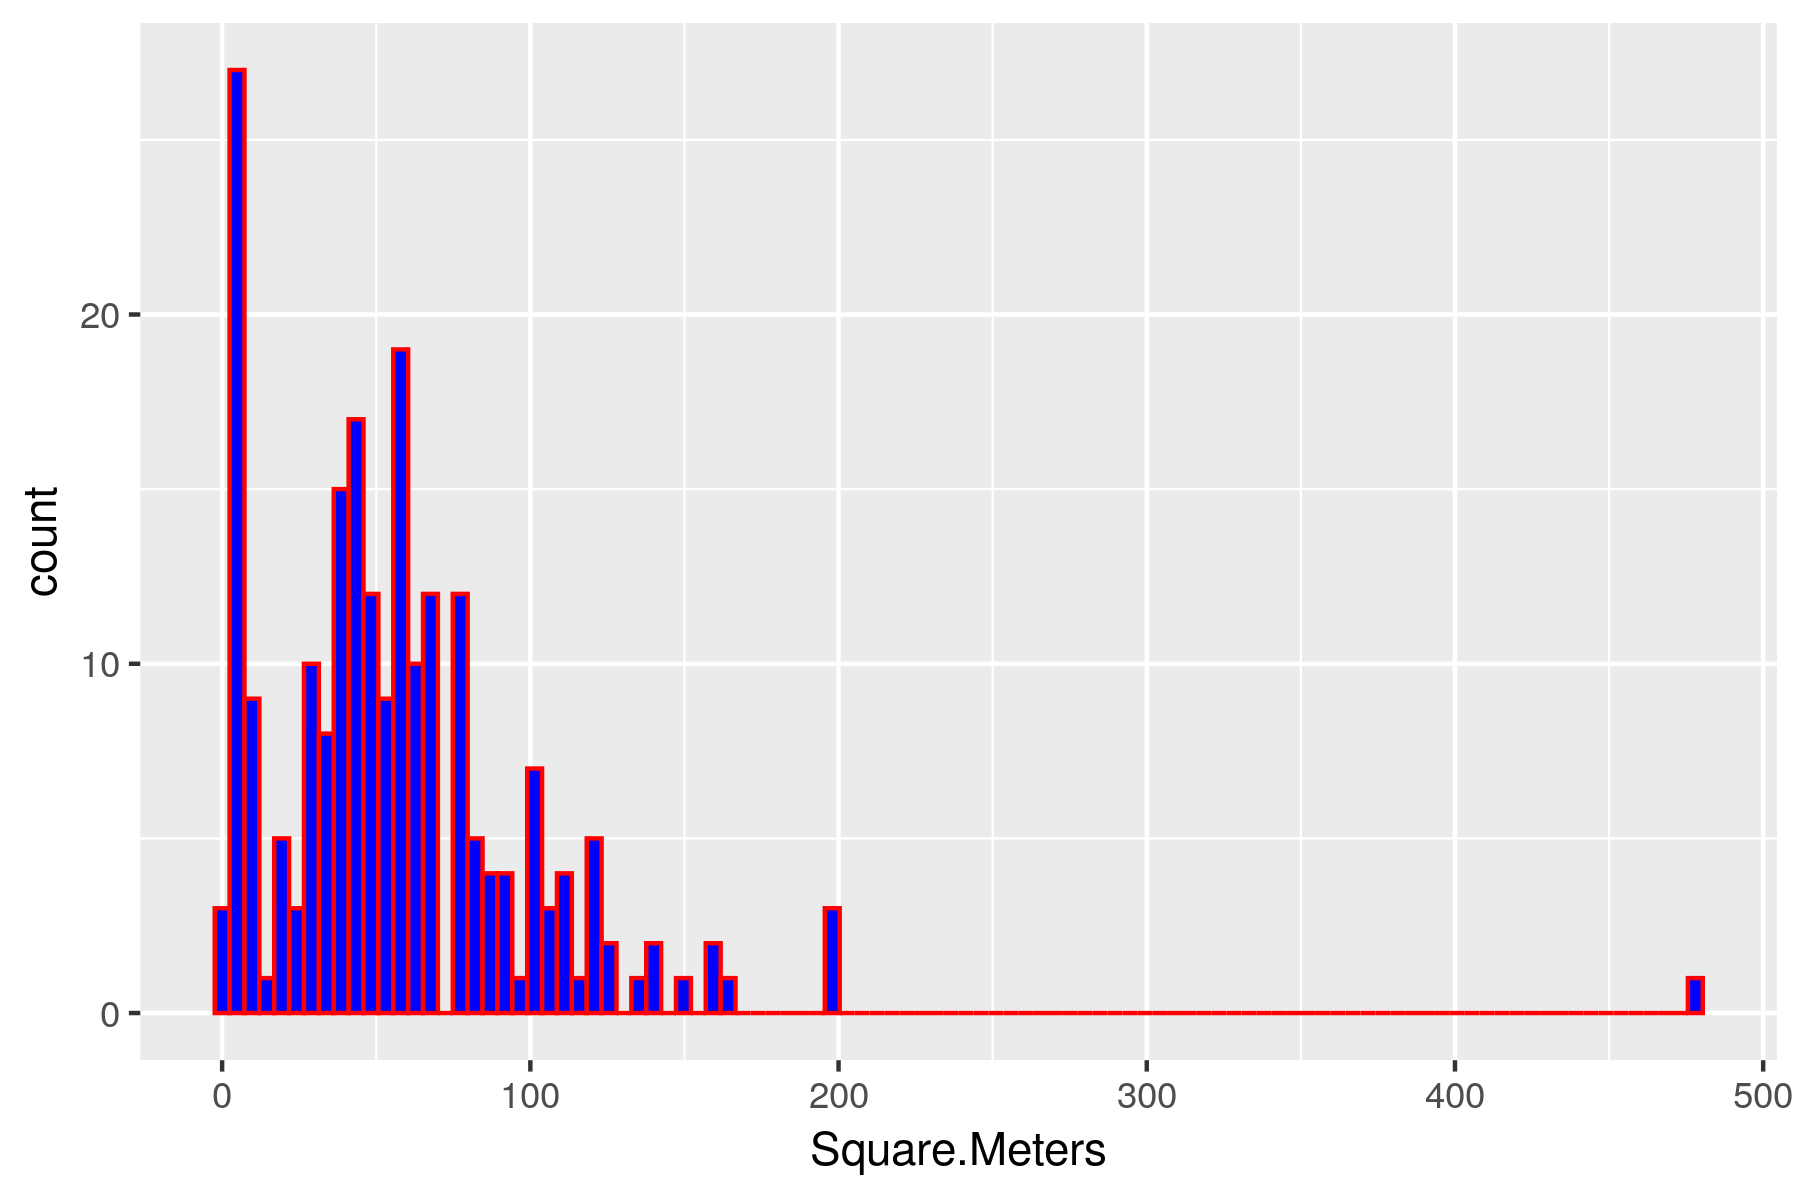

In [192]:
library(ggplot2)
ggplot(df_madrid, aes(x=Square.Meters)) + geom_histogram(bins=100, col='red', fill='blue')

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [193]:
df_madrid<-df_madrid %>% mutate(Square.Meters = ifelse(Square.Meters<20, NA, Square.Meters))
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Arapiles,2,1.0,1,2,40,1,0,100,40.43281,-3.706681,NA
2,Trafalgar,6,2.5,3,5,220,1,0,96,40.42931,-3.700321,NA
3,Trafalgar,3,1.5,1,1,103,1,0,91,40.43018,-3.701314,NA
4,Trafalgar,8,2.0,3,5,190,4,20,97,40.42883,-3.696778,NA
5,Trafalgar,4,1.0,1,2,75,2,10,98,40.43165,-3.703527,NA
6,Trafalgar,3,1.0,1,2,50,2,0,93,40.43068,-3.704753,NA


In [194]:
#Eliminamos los barrios que tienen todo NA

neighb_all_na <- df_madrid %>% group_by(Neighbourhood) %>% 
  summarise(num_na=sum(is.na(Square.Meters))/length(Square.Meters)) %>% 
  filter(num_na==1) %>% select(Neighbourhood)
df_madrid <- df_madrid[!df_madrid$Neighbourhood %in% neighb_all_na$Neighbourhood,]
paste("Quedan ",length(unique(df_madrid$Neighbourhood)),"barrios")

[1] "Quedan  38 barrios"

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

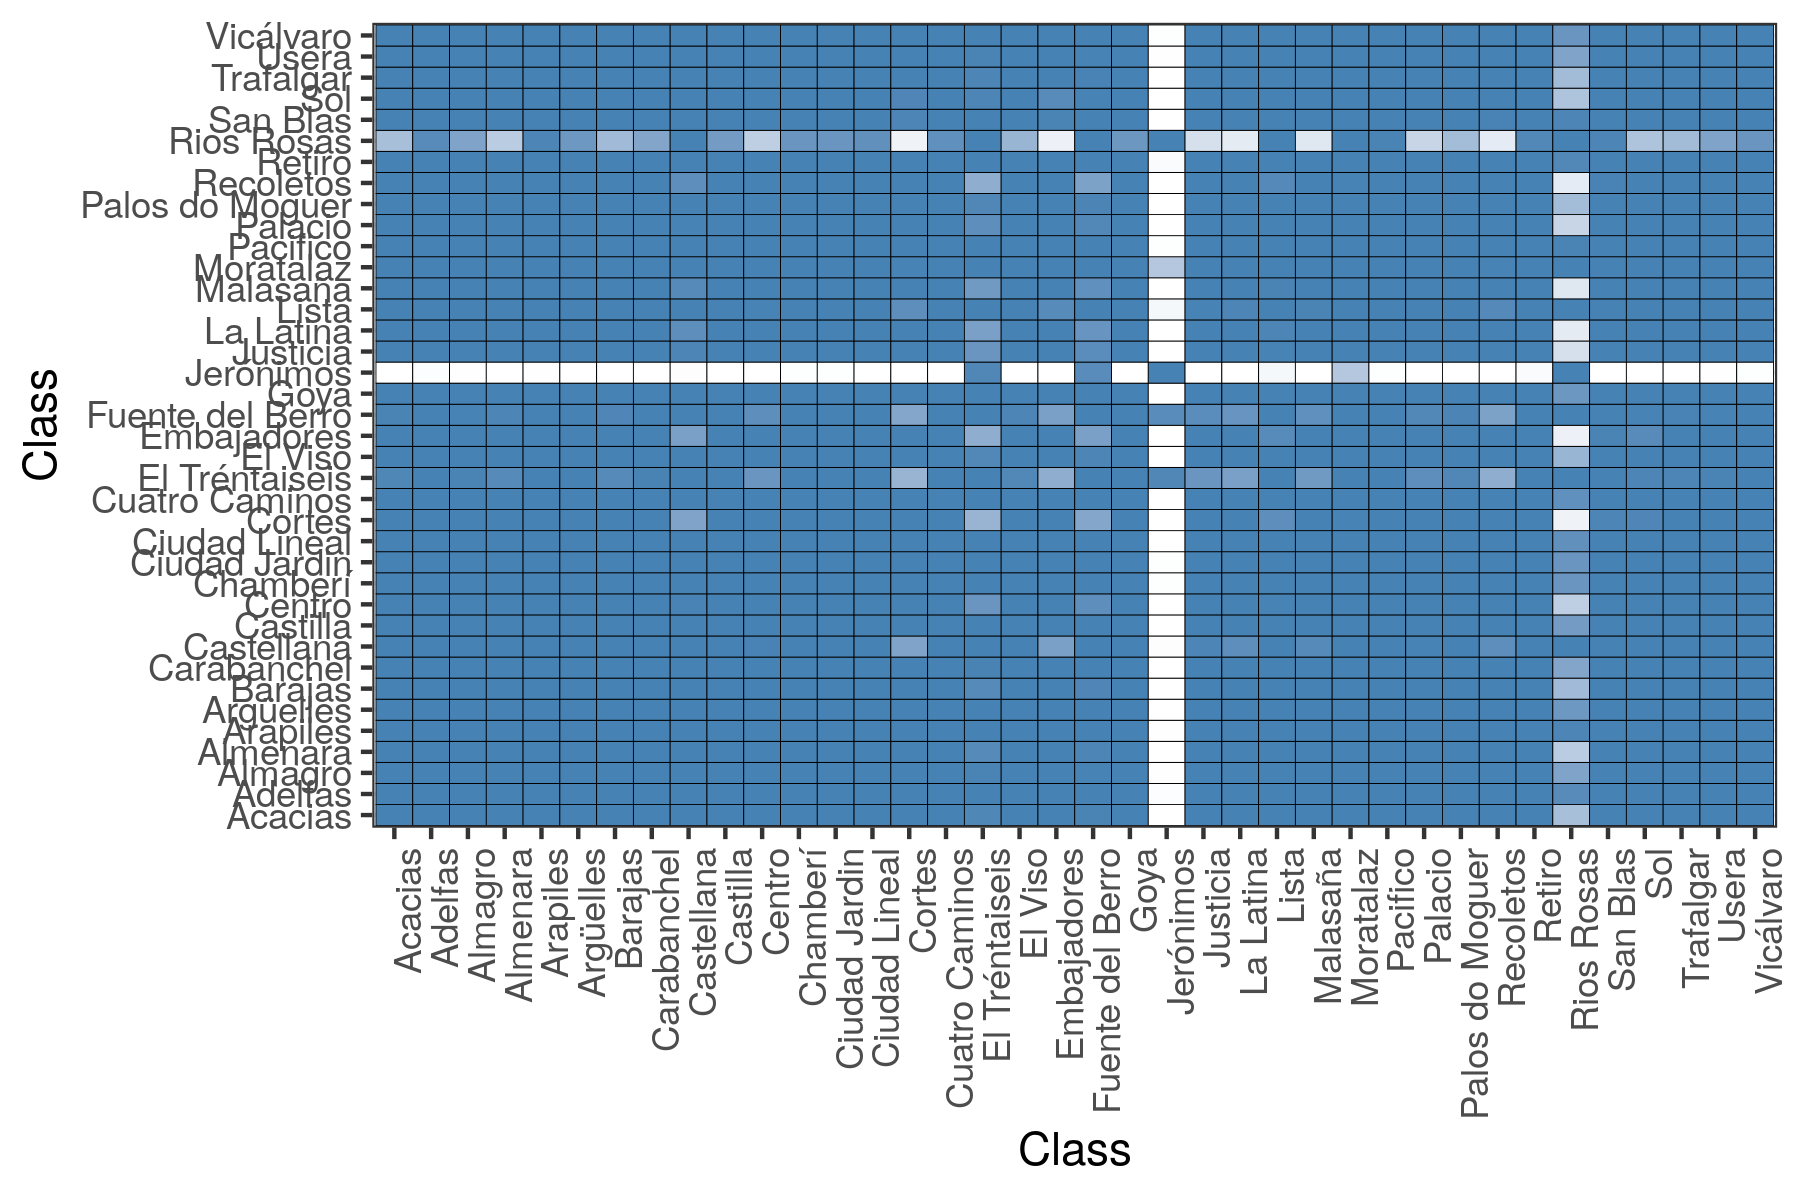

In [195]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


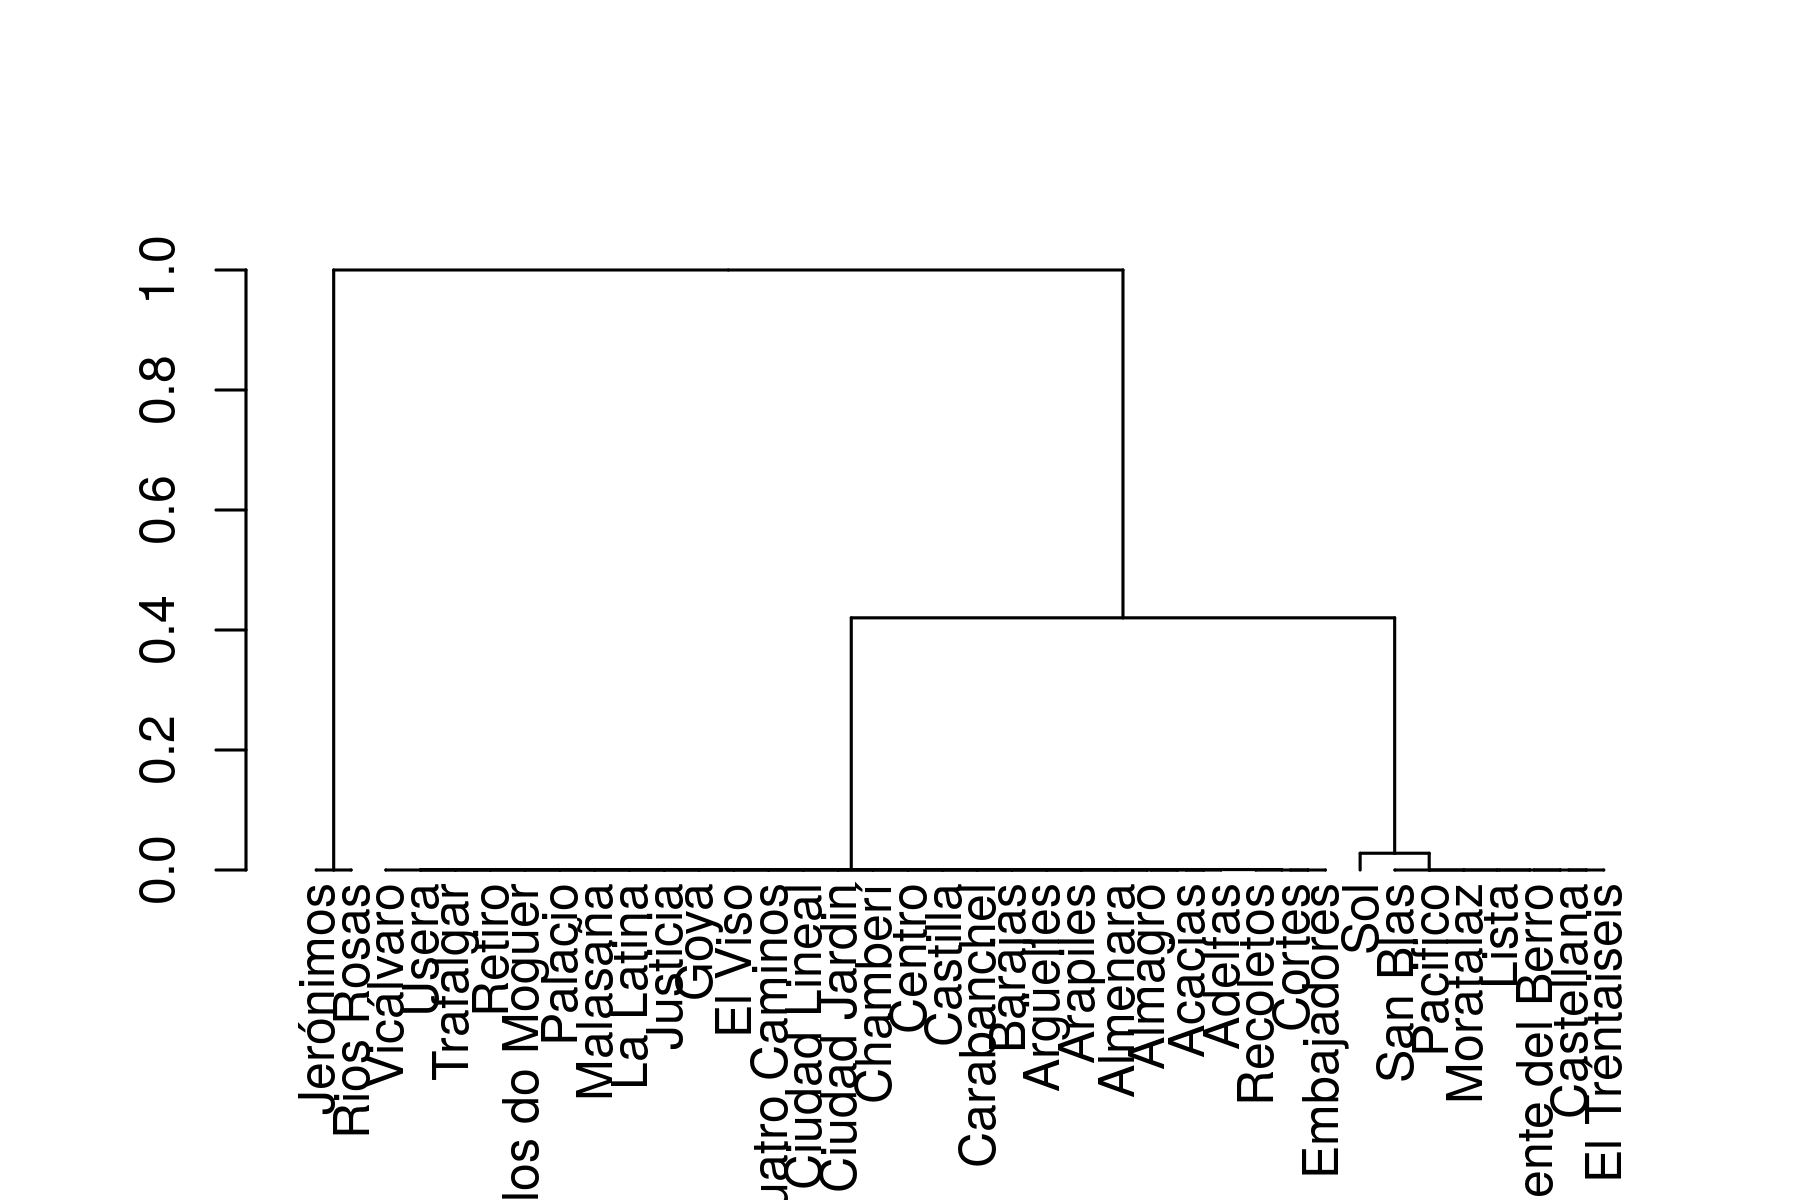

In [196]:
mDist <- as.dist(1 - resm)
hc <- hclust(mDist,method = "complete")
hcd <- as.dendrogram(hc)
plot(hcd)

Estableciendo un punto de corte en 0.9, ¿cuantos clusters aparecen?

[1] "4901  instancias tenemos para generar el modelo"

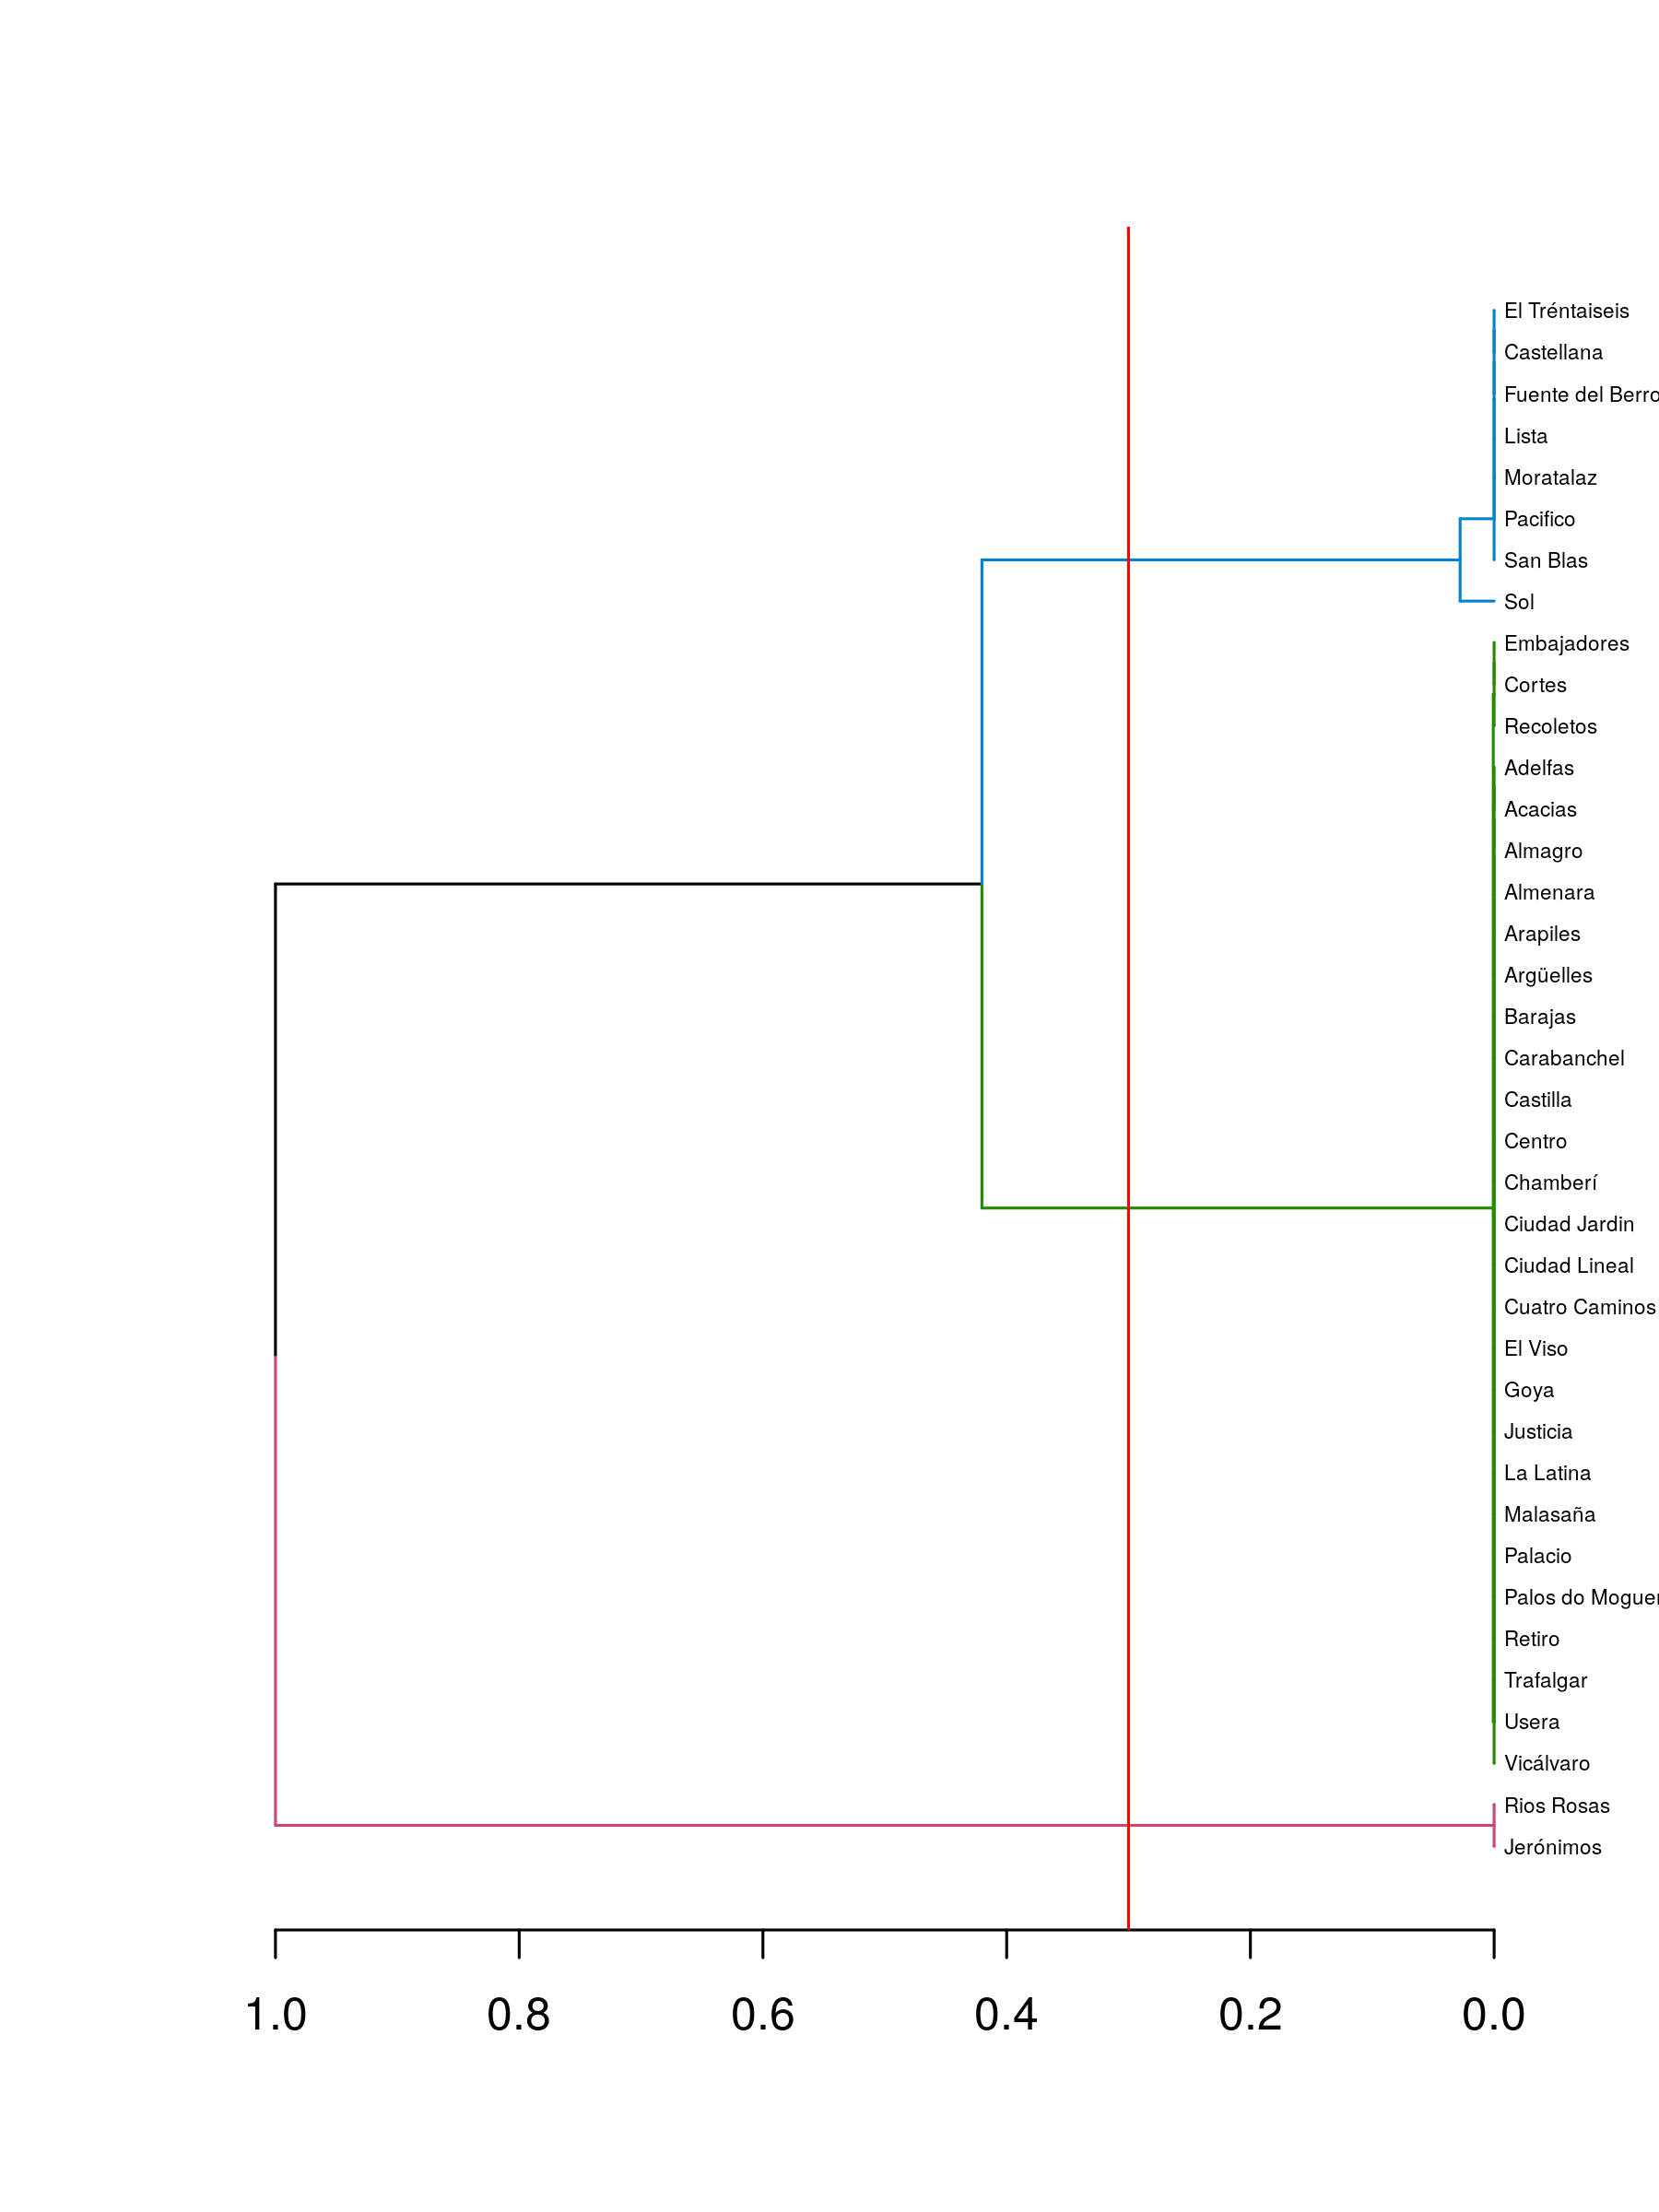

In [197]:
paste(nrow(df_madrid),  " instancias tenemos para generar el modelo")

library(dendextend)
hcd <- as.dendrogram(hc)
hcd<-set(hcd,"labels_cex", 0.45)
options(repr.plot.height=8,repr.plot.width=6,repr.plot.res = 300)
plot(color_branches(hcd,h=0.3),horiz=TRUE,cex=0)
abline(v=0.3,col="red")

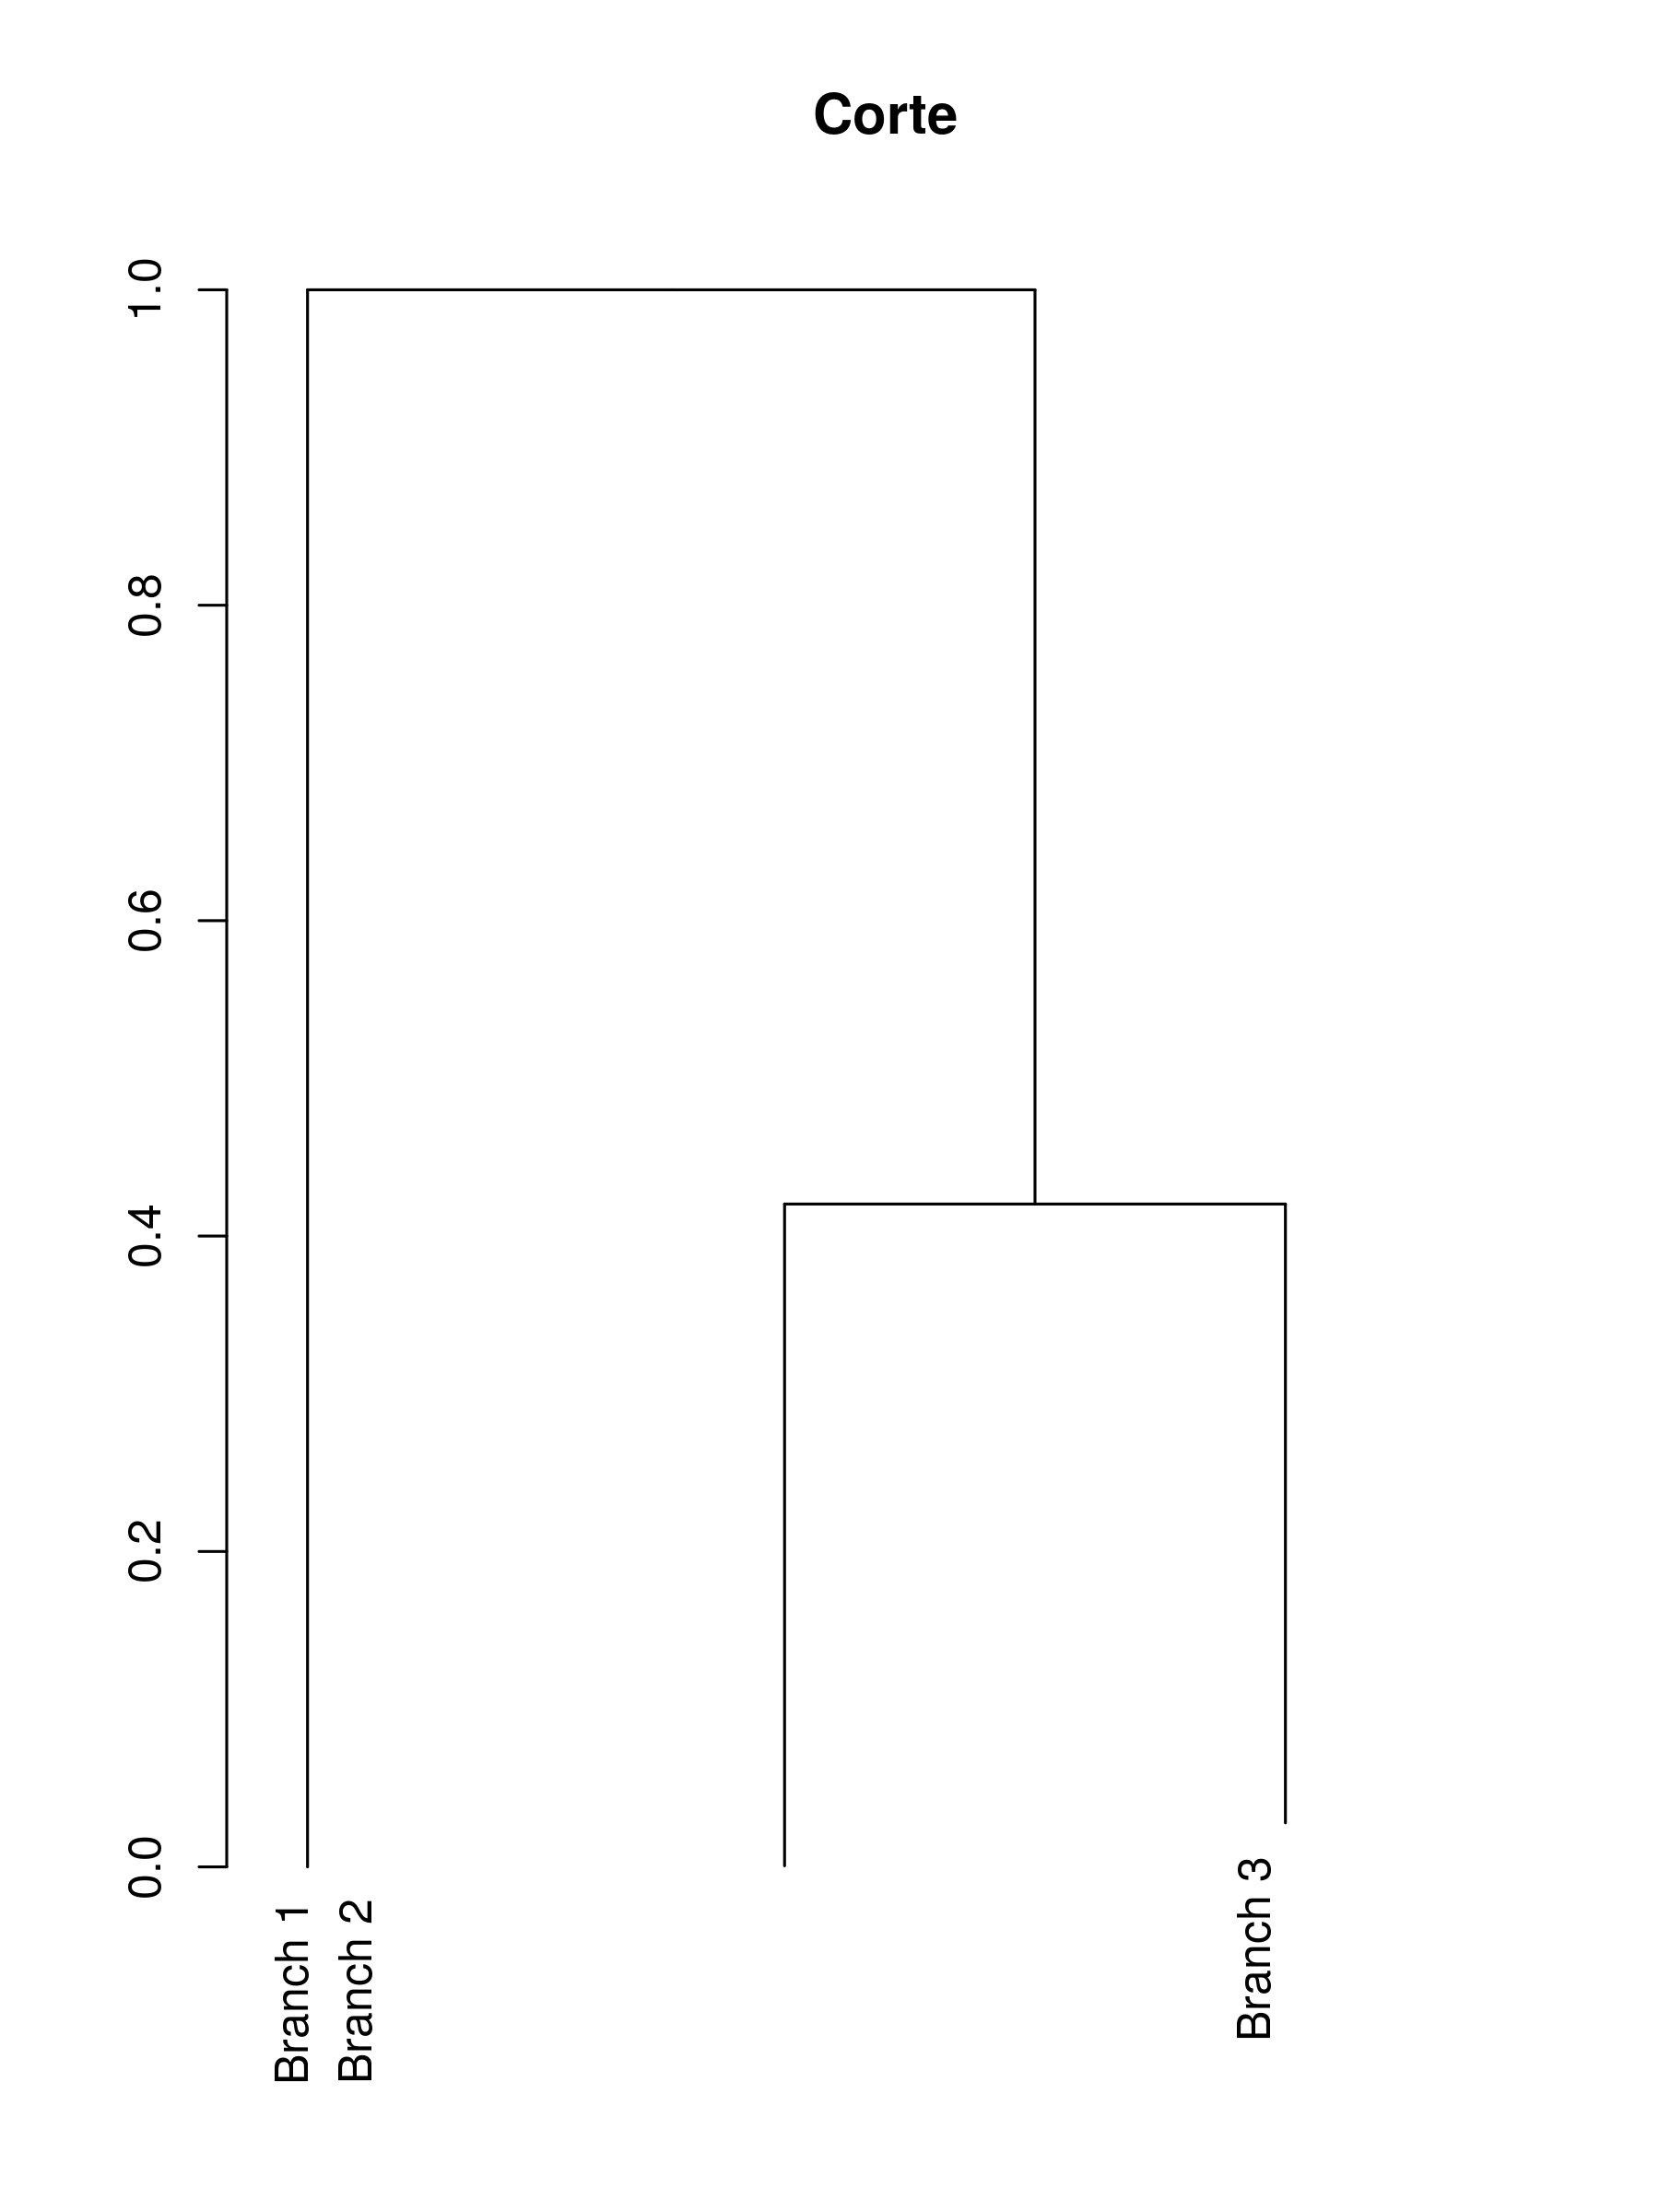

In [198]:
plot(cut(hcd, h = 0.3)$upper, main="Corte", cex=1)

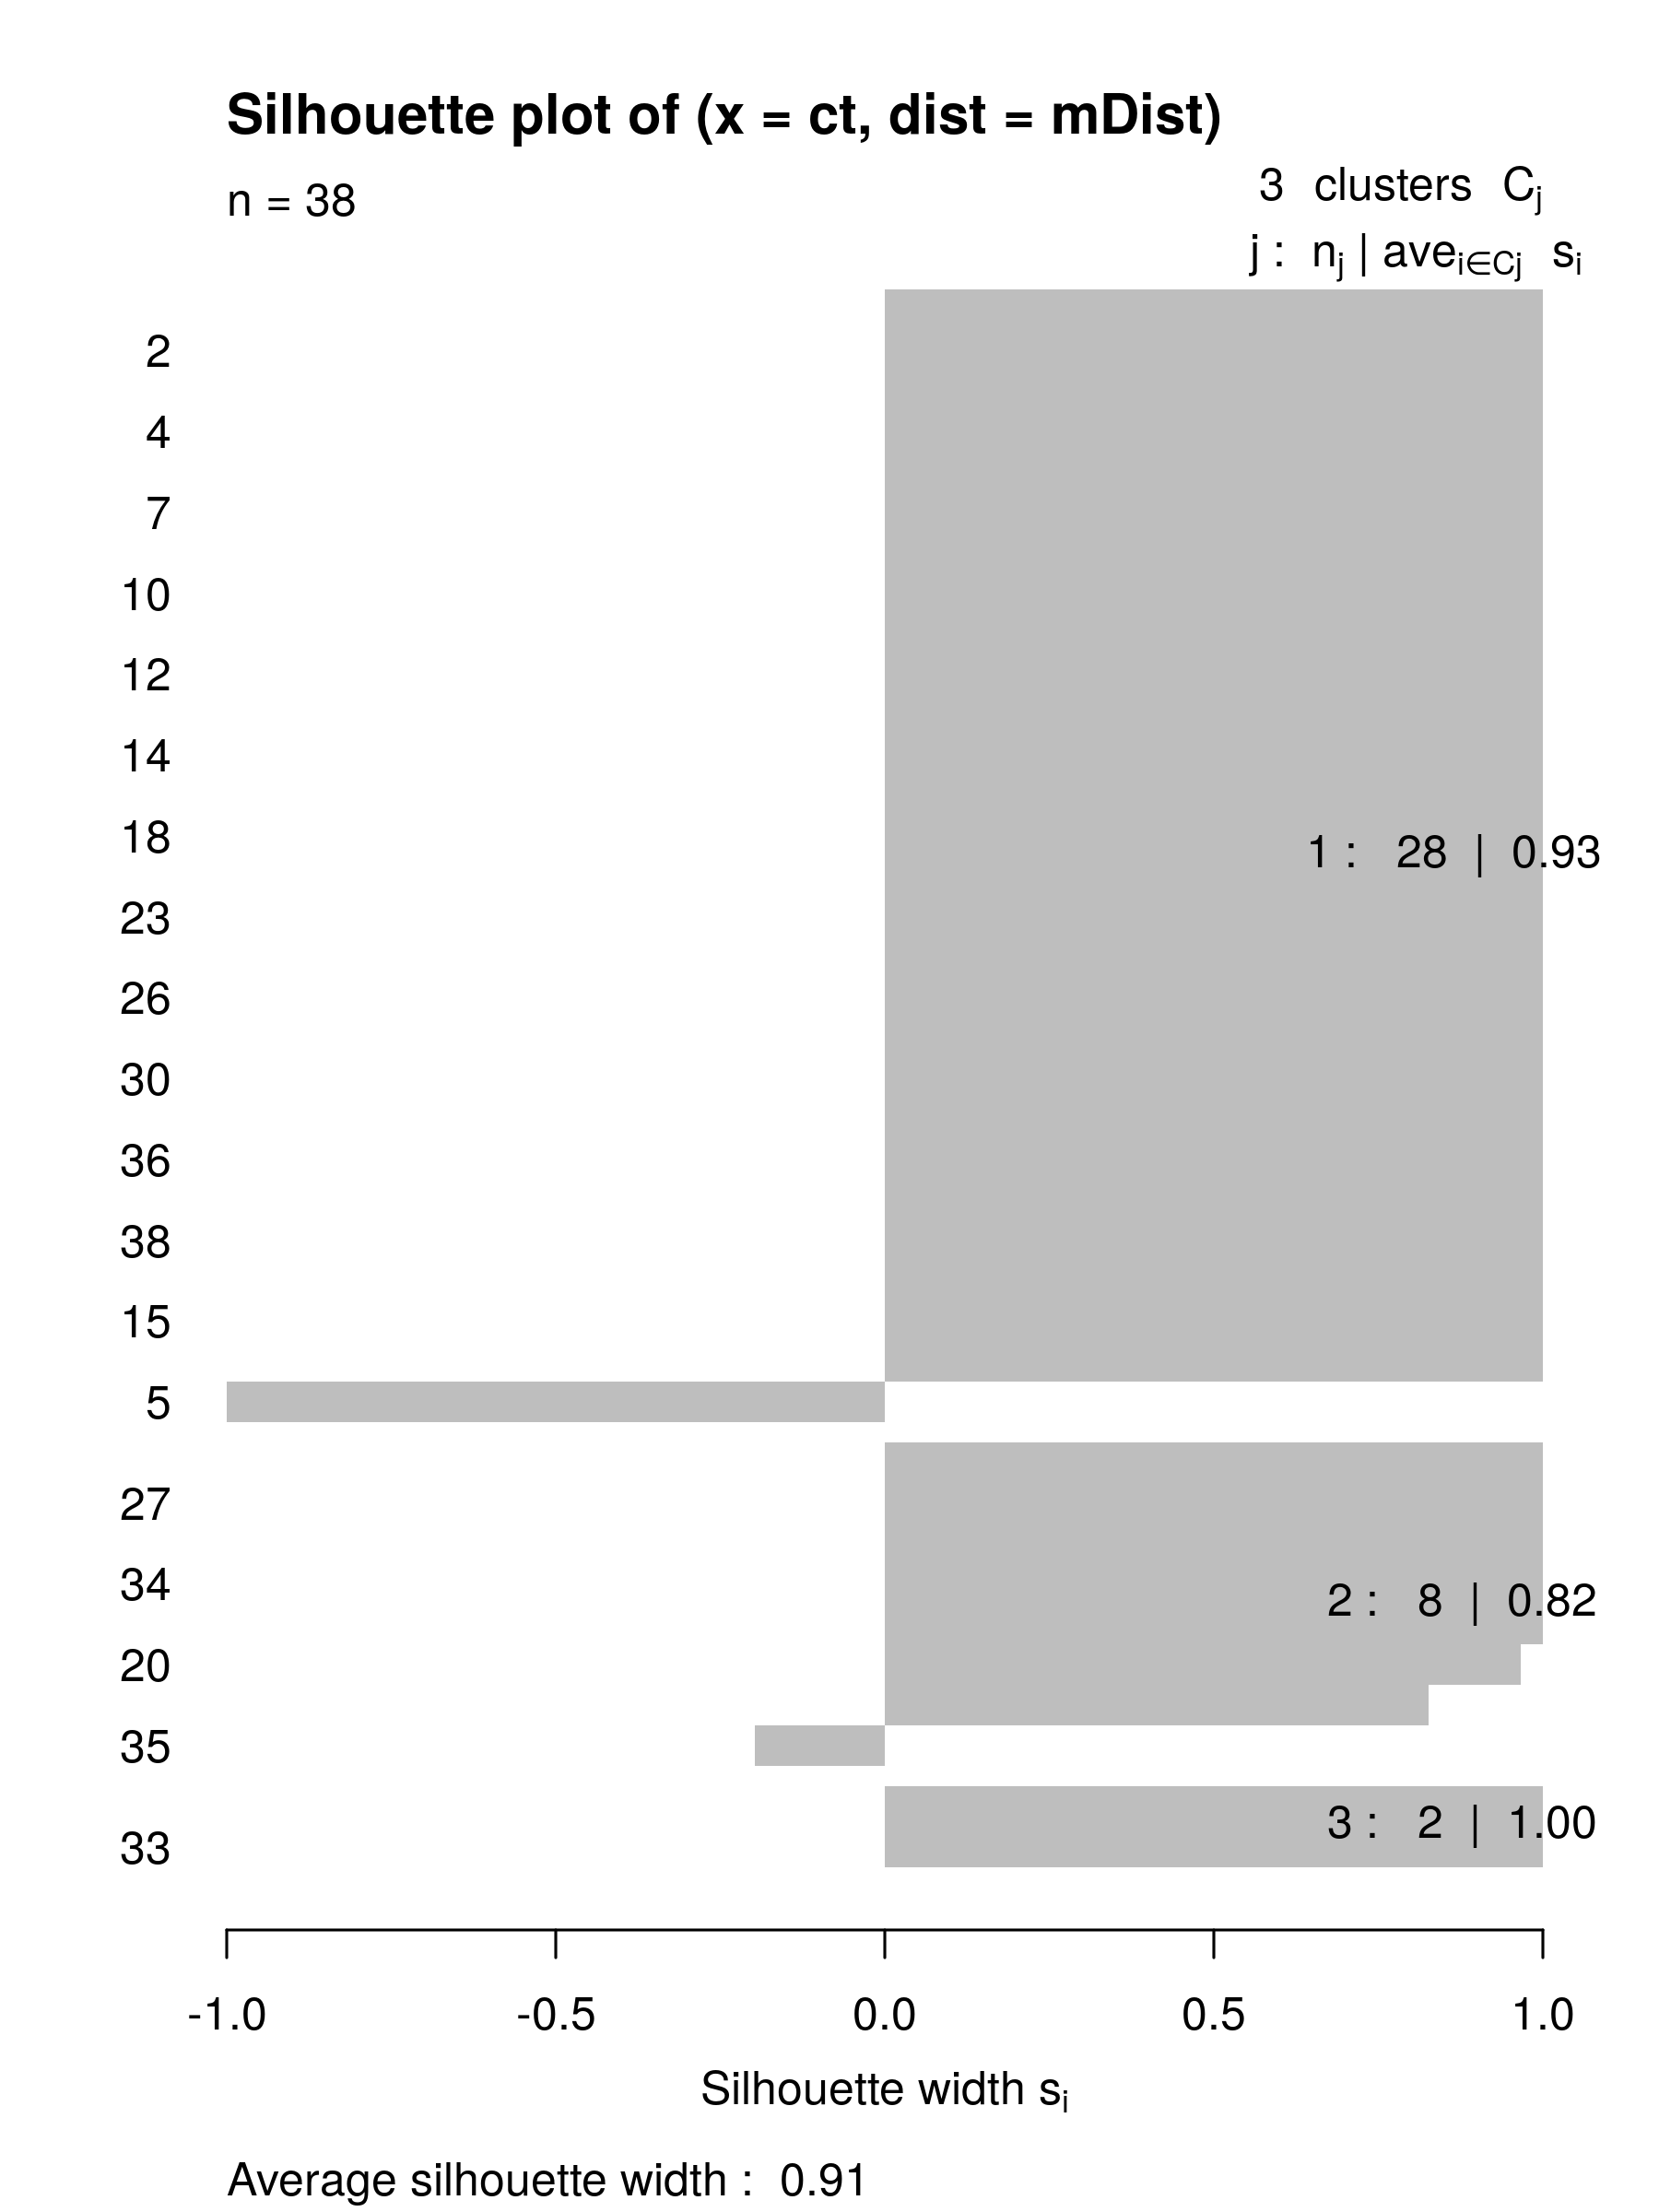

In [199]:
ct<-cutree(hc,h=0.3)
library(cluster)
sil<-silhouette(ct,mDist)
plot(sil,border=NA)

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [200]:
df_barrios <- data.frame(names = names(ct), neighb_id = ct)
head(df_barrios)

,names,neighb_id
,<fct>,<int>
Acacias,Acacias,1
Adelfas,Adelfas,1
Almagro,Almagro,1
Almenara,Almenara,1
Arapiles,Arapiles,1
Argüelles,Argüelles,1


In [201]:
## Inserto la columna de los ids de los clusters
df_madrid$Neighbourhood <- factor(df_madrid$Neighbourhood)
df_madrid$neighb_id <- ct[df_madrid$Neighbourhood]

In [202]:
str(df_madrid)

'data.frame':	4901 obs. of  13 variables:
 $ Neighbourhood       : Factor w/ 38 levels "Acacias","Adelfas",..: 5 36 36 36 36 36 3 8 37 37 ...
 $ Accommodates        : int  2 6 3 8 4 3 7 3 6 2 ...
 $ Bathrooms           : num  1 2.5 1.5 2 1 1 2 2 2 1 ...
 $ Bedrooms            : int  1 3 1 3 1 1 3 2 3 1 ...
 $ Beds                : int  2 5 1 5 2 2 4 2 6 1 ...
 $ Price               : int  40 220 103 190 75 50 180 35 90 49 ...
 $ Guests.Included     : int  1 1 1 4 2 2 5 1 4 2 ...
 $ Extra.People        : int  0 0 0 20 10 0 10 0 10 0 ...
 $ Review.Scores.Rating: int  100 96 91 97 98 93 92 100 80 94 ...
 $ Latitude            : num  40.4 40.4 40.4 40.4 40.4 ...
 $ Longitude           : num  -3.71 -3.7 -3.7 -3.7 -3.7 ...
 $ Square.Meters       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ neighb_id           : int  1 1 1 1 1 1 1 1 1 1 ...


In [203]:
## Convierto la columna neighb_id en factor para agrupar por cluster
df_madrid$neighb_id <-as.factor(df_madrid$neighb_id)
str(df_madrid)

'data.frame':	4901 obs. of  13 variables:
 $ Neighbourhood       : Factor w/ 38 levels "Acacias","Adelfas",..: 5 36 36 36 36 36 3 8 37 37 ...
 $ Accommodates        : int  2 6 3 8 4 3 7 3 6 2 ...
 $ Bathrooms           : num  1 2.5 1.5 2 1 1 2 2 2 1 ...
 $ Bedrooms            : int  1 3 1 3 1 1 3 2 3 1 ...
 $ Beds                : int  2 5 1 5 2 2 4 2 6 1 ...
 $ Price               : int  40 220 103 190 75 50 180 35 90 49 ...
 $ Guests.Included     : int  1 1 1 4 2 2 5 1 4 2 ...
 $ Extra.People        : int  0 0 0 20 10 0 10 0 10 0 ...
 $ Review.Scores.Rating: int  100 96 91 97 98 93 92 100 80 94 ...
 $ Latitude            : num  40.4 40.4 40.4 40.4 40.4 ...
 $ Longitude           : num  -3.71 -3.7 -3.7 -3.7 -3.7 ...
 $ Square.Meters       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ neighb_id           : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...


In [204]:
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
1,Arapiles,2,1.0,1,2,40,1,0,100,40.43281,-3.706681,NA,1
2,Trafalgar,6,2.5,3,5,220,1,0,96,40.42931,-3.700321,NA,1
3,Trafalgar,3,1.5,1,1,103,1,0,91,40.43018,-3.701314,NA,1
4,Trafalgar,8,2.0,3,5,190,4,20,97,40.42883,-3.696778,NA,1
5,Trafalgar,4,1.0,1,2,75,2,10,98,40.43165,-3.703527,NA,1
6,Trafalgar,3,1.0,1,2,50,2,0,93,40.43068,-3.704753,NA,1


Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [205]:
set.seed(12)
idx <- sample(1:nrow(df_madrid),0.8 * nrow(df_madrid))
train <- df_madrid[idx,]
test <- df_madrid[-idx,]

In [206]:
modelo <- lm(formula=Square.Meters~Accommodates+Price+Bedrooms, train)
summary(modelo)


Call:
lm(formula = Square.Meters ~ Accommodates + Price + Bedrooms, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.757 -14.264  -1.901  10.675 237.967 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.31706    6.54462  -0.201 0.840834    
Accommodates  7.54456    1.99116   3.789 0.000233 ***
Price         0.10395    0.03922   2.650 0.009069 ** 
Bedrooms     16.94510    4.22715   4.009 0.000104 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.36 on 126 degrees of freedom
  (3790 observations deleted due to missingness)
Multiple R-squared:  0.604,	Adjusted R-squared:  0.5945 
F-statistic: 64.05 on 3 and 126 DF,  p-value: < 2.2e-16


Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

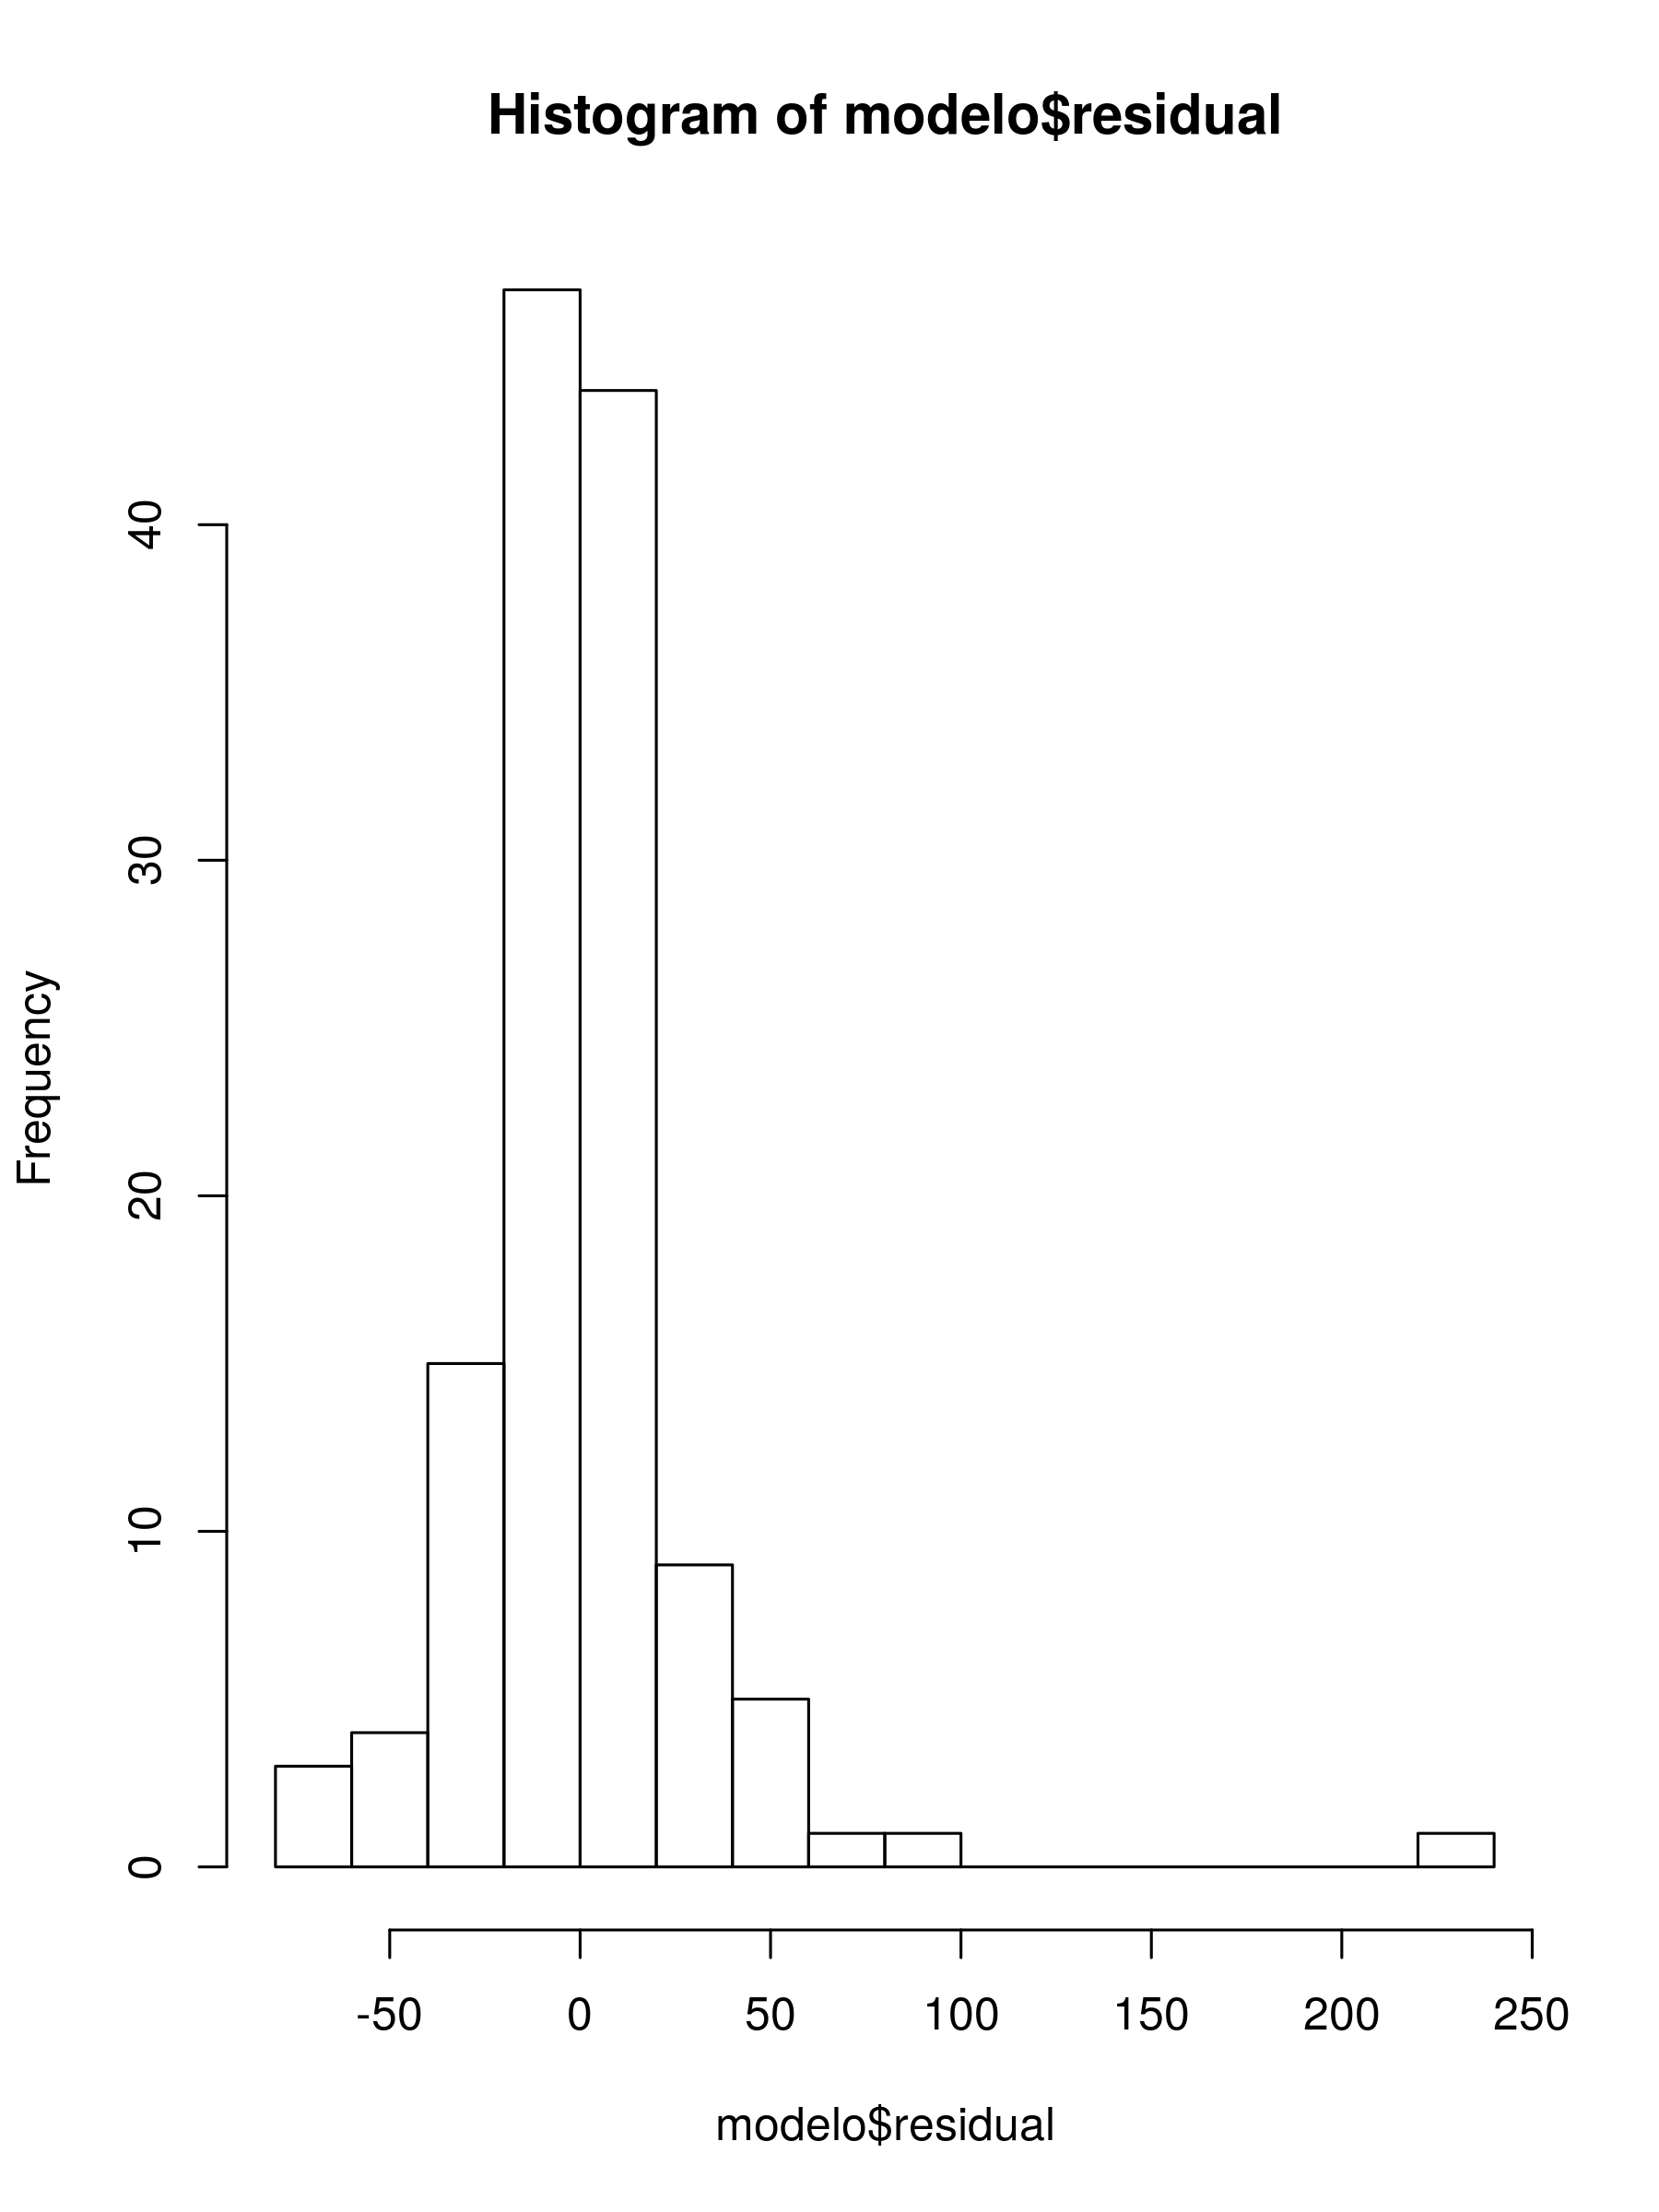

In [207]:
hist(modelo$residual,breaks=20)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates) con un precio de 80€/noche y 3 habitaciones en el barrio de Sol.
¿Cuantos metros cuadrados tendría?
¿Como varía sus metros cuadrados con cada habitación adicional?

In [208]:
apartamento <- data.frame(Neighbourhood = "Sol",Bedrooms=3, Price=80, Accommodates=6)
predicApartamentoM2 <- predict(modelo,apartamento)
paste(round(predicApartamentoM2), "Metros cuadrados")

[1] "103 Metros cuadrados"

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [209]:
df_madrid_id_all <- df_madrid %>% inner_join(df_barrios,by=c("Neighbourhood"='names')) 

df_madrid_id_all$Square.Meters[is.na(df_madrid_id_all$Square.Meters)]<-
 round(predict(modelo,df_madrid_id_all[is.na(df_madrid_id_all$Square.Meters),]))

summary(df_madrid)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms    
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.00  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.00  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.00  
 Sol        : 536   Mean   : 4.091   Mean   :1.244   Mean   : 1.42  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.00  
 Justicia   : 384   Max.   :16.000   Max.   :6.000   Max.   :10.00  
 (Other)    :1705                    NA's   :14      NA's   :7      
      Beds            Price        Guests.Included   Extra.People    
 Min.   : 1.000   Min.   : 18.00   Min.   : 1.000   Min.   :  0.000  
 1st Qu.: 1.000   1st Qu.: 59.00   1st Qu.: 1.000   1st Qu.:  0.000  
 Median : 2.000   Median : 75.00   Median : 2.000   Median : 10.000  
 Mean   : 2.366   Mean   : 90.39   Mean   : 1.954   Mean   :  9.019  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 2.000   3rd Qu.: 15.000  
 Max.   :16.000   Max.   :80

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [235]:
df_madrid_pca <- na.omit(df_madrid_id_all[,c("Accommodates","Bathrooms","Bedrooms","Latitude","Longitude","Beds",
                                    "Price","Review.Scores.Rating",
                                    "Square.Meters",'neighb_id.x','neighb_id.y')])

In [236]:
summary(df_madrid_pca)

  Accommodates      Bathrooms       Bedrooms        Latitude    
 Min.   : 1.000   Min.   :0.00   Min.   :0.000   Min.   :40.36  
 1st Qu.: 3.000   1st Qu.:1.00   1st Qu.:1.000   1st Qu.:40.41  
 Median : 4.000   Median :1.00   Median :1.000   Median :40.42  
 Mean   : 4.127   Mean   :1.24   Mean   :1.417   Mean   :40.42  
 3rd Qu.: 5.000   3rd Qu.:1.00   3rd Qu.:2.000   3rd Qu.:40.42  
 Max.   :16.000   Max.   :6.00   Max.   :8.000   Max.   :40.48  
   Longitude           Beds            Price        Review.Scores.Rating
 Min.   :-3.761   Min.   : 1.000   Min.   : 18.00   Min.   : 20.00      
 1st Qu.:-3.707   1st Qu.: 1.000   1st Qu.: 57.00   1st Qu.: 88.00      
 Median :-3.702   Median : 2.000   Median : 74.00   Median : 93.00      
 Mean   :-3.700   Mean   : 2.384   Mean   : 87.17   Mean   : 91.44      
 3rd Qu.:-3.698   3rd Qu.: 3.000   3rd Qu.: 99.00   3rd Qu.: 97.00      
 Max.   :-3.576   Max.   :16.000   Max.   :800.00   Max.   :100.00      
 Square.Meters    neighb_id.x  nei

In [237]:
pcaMatrix = data.matrix(df_madrid_pca)
pcaMatrix[sample(1:nrow(pcaMatrix),5),1:9]

,Accommodates,Bathrooms,Bedrooms,Latitude,Longitude,Beds,Price,Review.Scores.Rating,Square.Meters
1787,3,1,1,40.42055,-3.716232,2,40,84,42
1670,2,1,1,40.42623,-3.711147,1,75,100,39
1175,2,1,1,40.43491,-3.701873,1,50,91,36
919,6,1,2,40.42217,-3.696687,3,60,88,84
87,2,1,1,40.42636,-3.680171,1,105,80,42


In [238]:
pca <- prcomp(df_madrid_pca %>% select(-neighb_id.x),center = TRUE, scale. = TRUE)

In [239]:
str(pca)

List of 5
 $ sdev    : num [1:10] 2.137 1.187 1.008 0.983 0.815 ...
 $ rotation: num [1:10, 1:10] 0.4231 0.367 0.4185 0.0201 0.0409 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:10] "Accommodates" "Bathrooms" "Bedrooms" "Latitude" ...
  .. ..$ : chr [1:10] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:10] 4.13 1.24 1.42 40.42 -3.7 ...
  ..- attr(*, "names")= chr [1:10] "Accommodates" "Bathrooms" "Bedrooms" "Latitude" ...
 $ scale   : Named num [1:10] 1.9002 0.5035 0.9462 0.0117 0.0149 ...
  ..- attr(*, "names")= chr [1:10] "Accommodates" "Bathrooms" "Bedrooms" "Latitude" ...
 $ x       : num [1:4187, 1:10] -1.631 4.39 -0.715 4.449 -0.688 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4187] "1" "2" "3" "4" ...
  .. ..$ : chr [1:10] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [240]:
 get_closest_element<-function(pca, new_flat,num_flats){
    pca_new<-predict(pca,newdata = new_vector)
    pca_orig<-pca$x[,1:2]
    pca_new <-pca_new[,1:2]

    idx<-order(rowSums((pca_new-pca_orig)^2))
    df_madrid_pca[idx %in% 1:num_flats,]
}

In [241]:
head(df_madrid_pca)

,Accommodates,Bathrooms,Bedrooms,Latitude,Longitude,Beds,Price,Review.Scores.Rating,Square.Meters,neighb_id.x,neighb_id.y
,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<fct>,<int>
1,2,1.0,1,40.43281,-3.706681,2,40,100,35,1,1
2,6,2.5,3,40.42931,-3.700321,5,220,96,118,1,1
3,3,1.5,1,40.43018,-3.701314,1,103,91,49,1,1
4,8,2.0,3,40.42883,-3.696778,5,190,97,130,1,1
5,4,1.0,1,40.43165,-3.703527,2,75,98,54,1,1
6,3,1.0,1,40.43068,-3.704753,2,50,93,43,1,1


In [242]:
new_vector<-(df_madrid_pca %>% select(-neighb_id.x))[10,]
new_vector
get_closest_element(pca,new_vector,5)

,Accommodates,Bathrooms,Bedrooms,Latitude,Longitude,Beds,Price,Review.Scores.Rating,Square.Meters,neighb_id.y
,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>
10,2,1,1,40.38709,-3.70131,1,49,94,36,1


,Accommodates,Bathrooms,Bedrooms,Latitude,Longitude,Beds,Price,Review.Scores.Rating,Square.Meters,neighb_id.x,neighb_id.y
,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<fct>,<int>
2066,6,1.0,2,40.41633,-3.702919,3,110,100,89,2,2
2599,4,1.0,3,40.41303,-3.712934,3,78,80,88,1,1
2807,2,1.0,1,40.40859,-3.703433,1,30,90,34,1,1
4643,6,2.0,2,40.41591,-3.705965,2,130,95,91,2,2
4656,9,1.5,4,40.42767,-3.698982,5,129,86,148,1,1


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?